In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# COMPAS Recidivism - Exploratory Data Analysis

This notebook explores the COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) dataset to examine recidivism patterns and potential biases in risk assessment scores.

## Analysis Overview

- **Data Loading**: Loaded the COMPAS two-year recidivism dataset and selected key features including demographics (sex, age, race), risk scores (decile_score, score_text), and recidivism outcomes (is_recid, is_violent_recid, two_year_recid)

- **Recidivism by Sex**: Analyzed and visualized the fraction of both general and violent recidivism across sex categories, showing differences in recidivism rates between males and females

- **Recidivism by Race**: Examined recidivism patterns across different racial groups, revealing disparities in both general and violent recidivism rates among African-American, Asian, Caucasian, Hispanic, Native American, and Other racial categories

- **Age Distribution Analysis**: Created histograms showing the relationship between age and recidivism, demonstrating how recidivism rates vary across different age groups

- **Risk Score Distribution**: Generated boxplots comparing COMPAS decile scores across sex and race categories, highlighting potential biases in how risk scores are assigned to different demographic groups

In [2]:
# Load dataset
compas_scores = pd.read_csv('compas-scores-two-years.csv')

# Keep only a number of interesting columns
to_keep = ['sex', 'age', 'race', 'decile_score', 'score_text', 'is_recid', 'is_violent_recid', 'two_year_recid']
compas_scores = compas_scores[to_keep]
compas_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               7214 non-null   object
 1   age               7214 non-null   int64 
 2   race              7214 non-null   object
 3   decile_score      7214 non-null   int64 
 4   score_text        7214 non-null   object
 5   is_recid          7214 non-null   int64 
 6   is_violent_recid  7214 non-null   int64 
 7   two_year_recid    7214 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 451.0+ KB


### Recidivism Rates by Sex

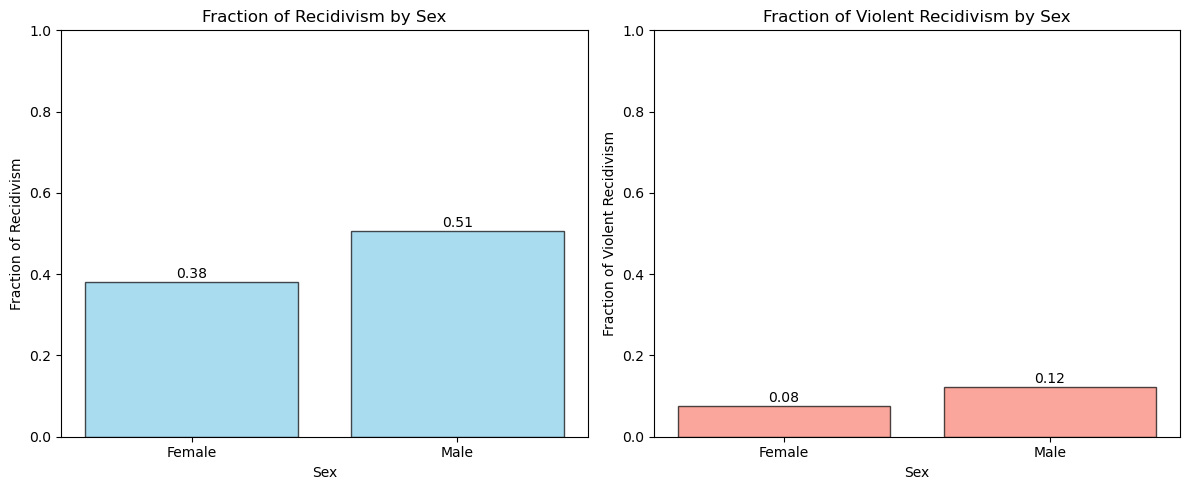

In [3]:
# Plot bar chart showing fraction of recidivism by sex
fraction_recidivism_by_sex = compas_scores.groupby('sex')['is_recid'].mean()
fraction_violent_recidivism_by_sex = compas_scores.groupby('sex')['is_violent_recid'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Regular recidivism
ax1.bar(fraction_recidivism_by_sex.index, fraction_recidivism_by_sex.values, color='skyblue', edgecolor='k', alpha=0.7)
ax1.set_title('Fraction of Recidivism by Sex')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Fraction of Recidivism')
ax1.set_ylim(0, 1)
for i, v in enumerate(fraction_recidivism_by_sex.values):
    ax1.text(i, v + 0.01, f'{v:.2f}', ha='center')

# Violent recidivism
ax2.bar(fraction_violent_recidivism_by_sex.index, fraction_violent_recidivism_by_sex.values, color='salmon', edgecolor='k', alpha=0.7)
ax2.set_title('Fraction of Violent Recidivism by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Fraction of Violent Recidivism')
ax2.set_ylim(0, 1)
for i, v in enumerate(fraction_violent_recidivism_by_sex.values):
    ax2.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()


Males show higher recidivism rates than females in both categories. General recidivism occurs in approximately 51% of males compared to 38% of females. The disparity is even more pronounced for violent recidivism, with males at 12% versus females at 8%. This indicates that males are consistently more likely to reoffend, whether for violent or non-violent crimes.

### Recidivism Rates by Race

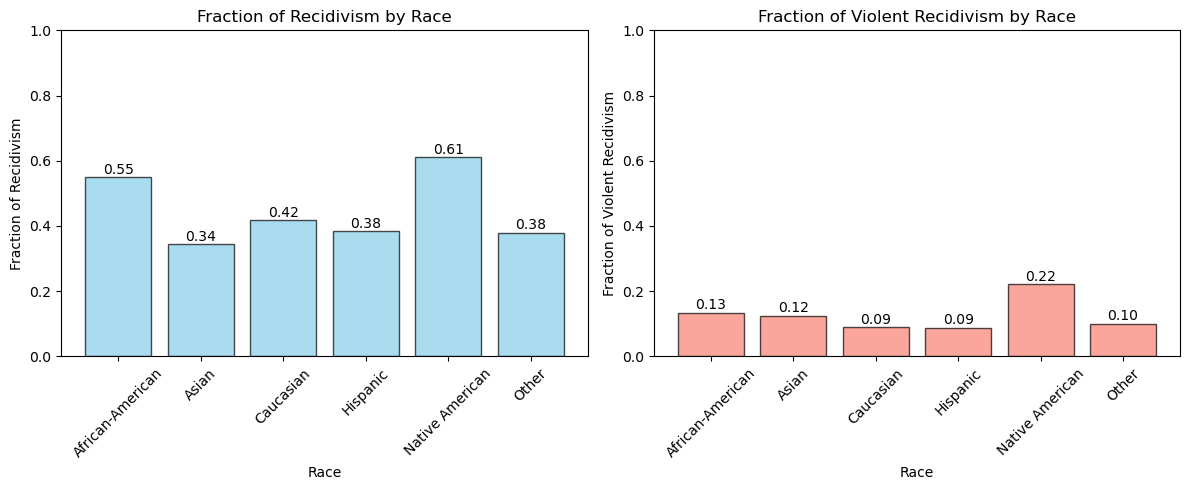

In [4]:
# Plot bar chart showing fraction of recidivism by race
fraction_recidivism_by_race = compas_scores.groupby('race')['is_recid'].mean()
fraction_violent_recidivism_by_race = compas_scores.groupby('race')['is_violent_recid'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Regular recidivism
ax1.bar(fraction_recidivism_by_race.index, fraction_recidivism_by_race.values, color='skyblue', edgecolor='k', alpha=0.7)
ax1.set_title('Fraction of Recidivism by Race')
ax1.set_xlabel('Race')
ax1.set_ylabel('Fraction of Recidivism')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(fraction_recidivism_by_race.values):
    ax1.text(i, v + 0.01, f'{v:.2f}', ha='center')

# Violent recidivism
ax2.bar(fraction_violent_recidivism_by_race.index, fraction_violent_recidivism_by_race.values, color='salmon', edgecolor='k', alpha=0.7)
ax2.set_title('Fraction of Violent Recidivism by Race')
ax2.set_xlabel('Race')
ax2.set_ylabel('Fraction of Violent Recidivism')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(fraction_violent_recidivism_by_race.values):
    ax2.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()


African-American and Native American individuals show the highest general recidivism rates at 55% and 61% respectively, significantly higher than Caucasian (42%), Hispanic (38%), Asian (34%), and Other (38%) groups. For violent recidivism, the pattern differs: Native Americans have the highest rate at 22%, followed by African-Americans at 13%, while other racial groups show lower rates ranging from 9-13%. This suggests that while African-Americans and Native Americans face elevated recidivism risk overall, the disparity is more pronounced for non-violent offenses.

### Recidivism Rates by Age

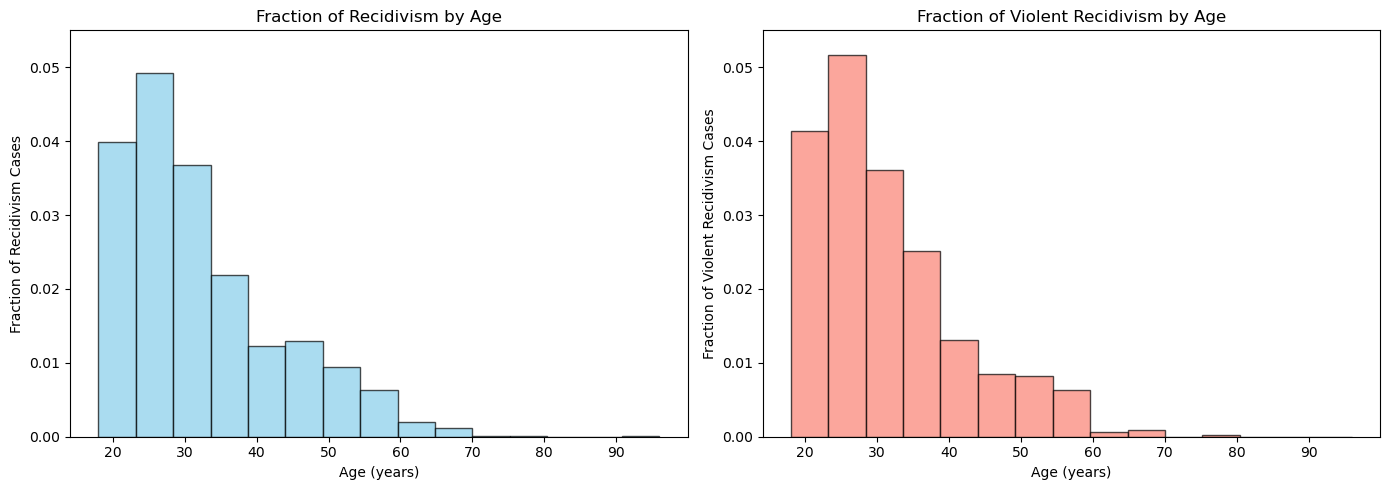

In [5]:
# Plot histograms showing fraction of recidivism by age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Regular recidivism
ax1.hist(compas_scores['age'], bins=15, color='skyblue', edgecolor='k', alpha=0.7, weights=compas_scores['is_recid'], density=True)
ax1.set_title('Fraction of Recidivism by Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Fraction of Recidivism Cases')
ax1.set_ylim([0, 0.055])

# Violent recidivism
ax2.hist(compas_scores['age'], bins=15, color='salmon', edgecolor='k', alpha=0.7, weights=compas_scores['is_violent_recid'], density=True)
ax2.set_title('Fraction of Violent Recidivism by Age')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Fraction of Violent Recidivism Cases')
ax2.set_ylim([0, 0.055])

plt.tight_layout()
plt.show()


Both histograms display right-skewed distributions, indicating that recidivism is concentrated among younger individuals. The mode for both general and violent recidivism appears to be in the 20-30 age range, with the highest fraction of recidivism cases occurring among younger offenders. As age increases, the fraction of recidivism cases decreases substantially, with very few cases observed beyond age 60. This pattern suggests that younger individuals are at significantly higher risk for both general and violent recidivism compared to older offenders.

### COMPAS Scores by Sex and Race

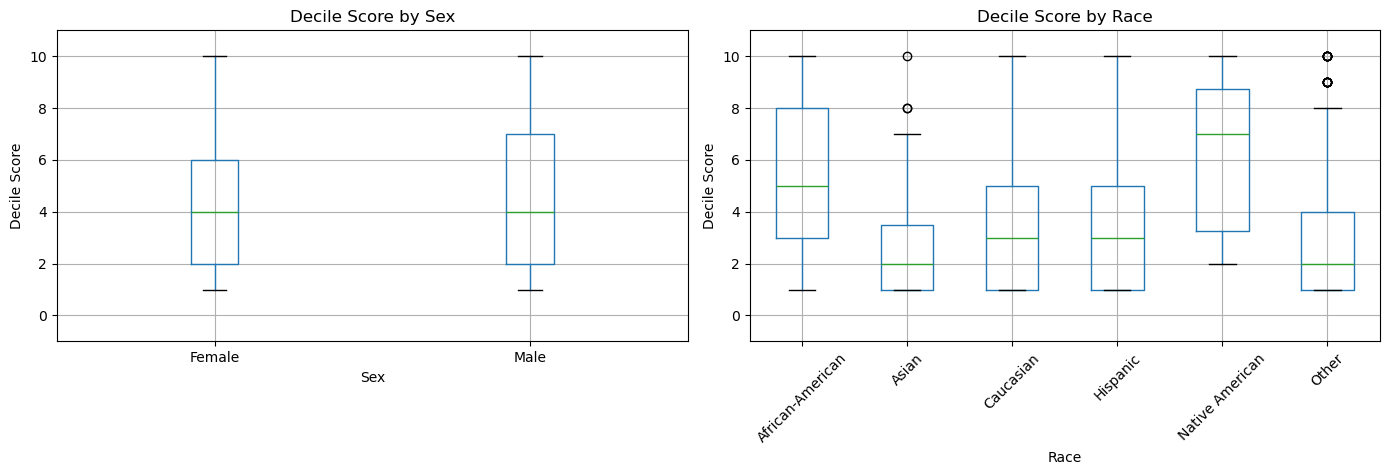

In [6]:
# Plot boxplots of the decile score 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# By sex
compas_scores.boxplot(column='decile_score', by='sex', ax=ax1)
ax1.set_title('Decile Score by Sex')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Decile Score')
ax1.set_ylim([-1, 11])

# By race
compas_scores.boxplot(column='decile_score', by='race', ax=ax2)
ax2.set_title('Decile Score by Race')
ax2.set_xlabel('Race')
ax2.set_ylabel('Decile Score')
ax2.set_ylim([-1, 11])
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('')
plt.tight_layout()
plt.show()

The boxplots reveal potential bias in COMPAS risk scoring across demographic groups. By sex, males receive decile scores with a wider distribution than females. By race, African-Americans and Native Americans show higher median scores and wider distributions compared to Caucasian, Hispanic, and Asian groups, indicating these populations may be systematically assigned higher risk scores.